<a href="https://colab.research.google.com/github/JimNewaz/NLP-Series/blob/main/Word_Embedding(word2vec).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Word2vec google api
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
word2vec_model["sarcasm"]

array([ 0.609375  , -0.16015625,  0.19042969,  0.10498047, -0.21582031,
        0.19921875, -0.07275391,  0.12988281,  0.27539062,  0.03881836,
       -0.12597656, -0.08935547,  0.14355469,  0.3203125 , -0.04541016,
       -0.13085938, -0.09082031,  0.14550781, -0.23046875, -0.31054688,
       -0.06445312,  0.03881836,  0.57421875, -0.1328125 ,  0.04101562,
       -0.06298828, -0.13085938,  0.30859375, -0.13378906,  0.1640625 ,
       -0.19628906,  0.05273438,  0.03417969, -0.10888672,  0.01507568,
        0.06933594,  0.13476562,  0.01855469,  0.04931641,  0.15625   ,
        0.48828125, -0.24902344,  0.17089844, -0.04931641, -0.07470703,
        0.15234375, -0.21191406,  0.10742188, -0.31445312,  0.27148438,
       -0.49023438,  0.29882812, -0.19238281, -0.12792969,  0.12890625,
        0.20410156, -0.20019531,  0.11328125, -0.08203125, -0.24609375,
       -0.19824219, -0.046875  ,  0.09179688, -0.05102539, -0.21679688,
        0.02307129, -0.29101562, -0.18261719, -0.41210938,  0.43

## W2V understand the meanings of words

In [5]:
word2vec_model.most_similar("sarcasm")

[('snark', 0.653512716293335),
 ('humor', 0.6242319941520691),
 ('sarcastic', 0.6220388412475586),
 ('self_deprecating_humor', 0.6171834468841553),
 ('self_deprecation', 0.607752799987793),
 ('condescension', 0.6044954061508179),
 ('snarkiness', 0.5990619659423828),
 ('irony', 0.5971056818962097),
 ('facetiousness', 0.5904334783554077),
 ('wit', 0.5846673250198364)]

## Test queen - girl + boy = king

In [7]:
word2vec_model.most_similar(positive=['boy', 'queen'], negative=['girl'])

[('king', 0.7298422455787659),
 ('queens', 0.6158193349838257),
 ('kings', 0.6095129251480103),
 ('monarch', 0.6066232919692993),
 ('princess', 0.5654319524765015),
 ('prince', 0.5591371059417725),
 ('royal', 0.5565179586410522),
 ('NYC_anglophiles_aflutter', 0.5358611345291138),
 ('Queen', 0.5305615067481995),
 ('very_pampered_McElhatton', 0.5251961350440979)]

In [6]:
word2vec_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.7298422455787659)]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


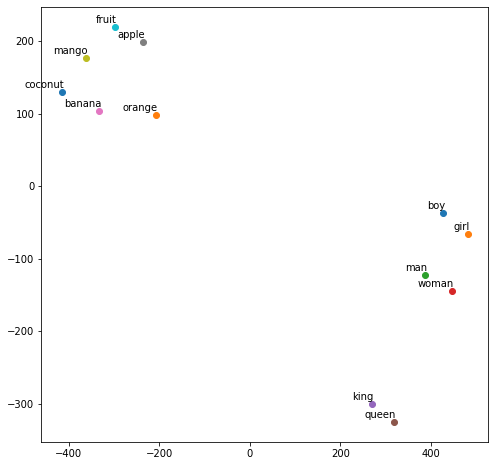

In [8]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec_model)